In [136]:
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from hyperopt import Trials, fmin, tpe, hp

from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from hyperopt_svm import run_svm
import pickle
import os
import traceback
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cm
plt.style.use('ggplot')

In [2]:
def get_data(folder_path):
    files = ['tk1_state4.npy', 'tk1_state5.npy', 'tk3_state4.npy', 'tk3_state5.npy']
    paths = [os.path.join(folder_path, file) for file in files]
    data = []
    labels = []
    for i,path in enumerate(paths):
        
        if i == 0:
            data = np.load(path)
            labels = [i + 1] * len(data)
            continue
            
        d = np.load(path)
        data = np.vstack((data, d))
        labels.extend([i+1] * len(d))
        
    return data, labels

In [3]:
alpha_path = 'alpha_band_graphs'
beta_path = 'beta_band_graphs'
gamma_path = 'gamma_band_graphs'

X_alpha, y_alpha = get_data(alpha_path)
X_beta, y_beta = get_data(beta_path)
X_gamma, y_gamma = get_data(gamma_path)

X_alpha = np.reshape(X_alpha, (-1, 68*68))
X_beta = np.reshape(X_beta, (-1, 68*68))
X_gamma = np.reshape(X_gamma, (-1, 68*68))

scaler_alpha = StandardScaler()
scaler_beta = StandardScaler()
scaler_gamma = StandardScaler()

X_alpha = scaler_alpha.fit_transform(X_alpha)
X_beta = scaler_beta.fit_transform(X_beta)
X_gamma = scaler_gamma.fit_transform(X_gamma)

Xa_train, Xa_test, ya_train, ya_test = train_test_split(X_alpha, y_alpha, test_size=0.33, random_state=42)
Xb_train, Xb_test, yb_train, yb_test = train_test_split(X_alpha, y_alpha, test_size=0.33, random_state=42)
Xg_train, Xg_test, yg_train, yg_test = train_test_split(X_alpha, y_alpha, test_size=0.33, random_state=42)

np.savez('train_test_data/alpha.npz', X_train=Xa_train, X_test=Xa_test, y_train=ya_train, y_test=ya_test)
np.savez('train_test_data/beta.npz', X_train=Xb_train, X_test=Xb_test, y_train=yb_train, y_test=yb_test)
np.savez('train_test_data/gamma.npz', X_train=Xg_train, X_test=Xg_test, y_train=yg_train, y_test=yg_test)

In [4]:
space = {
    'band': hp.choice('band', ['alpha', 'beta', 'gamma']),
    'params': {
        'C': hp.lognormal('C', 0,1),
        'kernel': hp.choice('kernel', ['rbf','poly', 'linear', 'sigmoid']),
        'degree': hp.choice('degree', range(1,5)),
        'gamma': hp.uniform('gamma',1e-2, 1e2)
    }
}

In [5]:
def run_trial():

    max_evals = nb_evals = 1

    try:
        trials = pickle.load(open("results.pkl", "rb"))
        print("Found saved Trials! Loading...")
        max_evals = len(trials.trials) + nb_evals
        print("Rerunning from {} trials to add another one.".format(
            len(trials.trials)))

    except:
        trials = Trials()
        print("Starting from scratch: new trials.")

    print("\nSTARTED OPTIMIZATION STEP.\n")
    best = fmin(run_svm, space, algo=tpe.suggest, trials=trials, max_evals=max_evals)

    pickle.dump(trials, open("results.pkl", "wb"))

    print("\nOPTIMIZATION STEP COMPLETE.\n")

In [6]:
while True:
    try:
        run_trial()
    except Exception as err:

        print(str(err))
        print(str(traceback.format_exc()))
        break;

Starting from scratch: new trials.

STARTED OPTIMIZATION STEP.

100%|██████████| 1/1 [00:18<00:00, 18.29s/trial, best loss: -1.0]

OPTIMIZATION STEP COMPLETE.

Found saved Trials! Loading...
Rerunning from 1 trials to add another one.

STARTED OPTIMIZATION STEP.

100%|██████████| 2/2 [00:30<00:00, 15.03s/trial, best loss: -1.0]

OPTIMIZATION STEP COMPLETE.

Found saved Trials! Loading...
Rerunning from 2 trials to add another one.

STARTED OPTIMIZATION STEP.

100%|██████████| 3/3 [00:51<00:00, 17.01s/trial, best loss: -1.0]

OPTIMIZATION STEP COMPLETE.

Found saved Trials! Loading...
Rerunning from 3 trials to add another one.

STARTED OPTIMIZATION STEP.

100%|██████████| 4/4 [02:32<00:00, 38.20s/trial, best loss: -1.0] 

OPTIMIZATION STEP COMPLETE.

Found saved Trials! Loading...
Rerunning from 4 trials to add another one.

STARTED OPTIMIZATION STEP.

 80%|████████  | 4/5 [00:00<?, ?trial/s, best loss=?]

/home/kam/.virtualenvs/dl4cv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



100%|██████████| 5/5 [02:18<00:00, 27.67s/trial, best loss: -1.0] 

OPTIMIZATION STEP COMPLETE.

Found saved Trials! Loading...
Rerunning from 5 trials to add another one.

STARTED OPTIMIZATION STEP.

100%|██████████| 6/6 [00:18<00:00,  3.05s/trial, best loss: -1.0]

OPTIMIZATION STEP COMPLETE.

Found saved Trials! Loading...
Rerunning from 6 trials to add another one.

STARTED OPTIMIZATION STEP.

100%|██████████| 7/7 [00:18<00:00,  2.60s/trial, best loss: -1.0]

OPTIMIZATION STEP COMPLETE.

Found saved Trials! Loading...
Rerunning from 7 trials to add another one.

STARTED OPTIMIZATION STEP.

100%|██████████| 8/8 [00:35<00:00,  4.46s/trial, best loss: -1.0]

OPTIMIZATION STEP COMPLETE.

Found saved Trials! Loading...
Rerunning from 8 trials to add another one.

STARTED OPTIMIZATION STEP.

100%|██████████| 9/9 [02:32<00:00, 17.00s/trial, best loss: -1.0] 

OPTIMIZATION STEP COMPLETE.

Found saved Trials! Loading...
Rerunning from 9 trials to add another one.

STARTED OPTIMIZATION STEP.

/home/kam/.virtualenvs/dl4cv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



100%|██████████| 10/10 [00:18<00:00,  1.82s/trial, best loss: -1.0]

OPTIMIZATION STEP COMPLETE.

Found saved Trials! Loading...
Rerunning from 10 trials to add another one.

STARTED OPTIMIZATION STEP.

100%|██████████| 11/11 [02:18<00:00, 12.58s/trial, best loss: -1.0] 

OPTIMIZATION STEP COMPLETE.

Found saved Trials! Loading...
Rerunning from 11 trials to add another one.

STARTED OPTIMIZATION STEP.

100%|██████████| 12/12 [01:34<00:00,  7.90s/trial, best loss: -1.0]

OPTIMIZATION STEP COMPLETE.

Found saved Trials! Loading...
Rerunning from 12 trials to add another one.

STARTED OPTIMIZATION STEP.

100%|██████████| 13/13 [02:18<00:00, 10.64s/trial, best loss: -1.0] 

OPTIMIZATION STEP COMPLETE.

Found saved Trials! Loading...
Rerunning from 13 trials to add another one.

STARTED OPTIMIZATION STEP.

100%|██████████| 14/14 [00:18<00:00,  1.30s/trial, best loss: -1.0]

OPTIMIZATION STEP COMPLETE.

Found saved Trials! Loading...
Rerunning from 14 trials to add another one.

STARTED OPT

/home/kam/.virtualenvs/dl4cv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



100%|██████████| 16/16 [02:33<00:00,  9.59s/trial, best loss: -1.0] 

OPTIMIZATION STEP COMPLETE.

Found saved Trials! Loading...
Rerunning from 16 trials to add another one.

STARTED OPTIMIZATION STEP.

100%|██████████| 17/17 [00:18<00:00,  1.07s/trial, best loss: -1.0]

OPTIMIZATION STEP COMPLETE.

Found saved Trials! Loading...
Rerunning from 17 trials to add another one.

STARTED OPTIMIZATION STEP.

100%|██████████| 18/18 [00:18<00:00,  1.02s/trial, best loss: -1.0]

OPTIMIZATION STEP COMPLETE.

Found saved Trials! Loading...
Rerunning from 18 trials to add another one.

STARTED OPTIMIZATION STEP.

100%|██████████| 19/19 [00:30<00:00,  1.59s/trial, best loss: -1.0]

OPTIMIZATION STEP COMPLETE.

Found saved Trials! Loading...
Rerunning from 19 trials to add another one.

STARTED OPTIMIZATION STEP.

100%|██████████| 20/20 [00:18<00:00,  1.09trial/s, best loss: -1.0]

OPTIMIZATION STEP COMPLETE.

Found saved Trials! Loading...
Rerunning from 20 trials to add another one.

STARTED OPTI

/home/kam/.virtualenvs/dl4cv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



100%|██████████| 27/27 [00:18<00:00,  1.48trial/s, best loss: -1.0]

OPTIMIZATION STEP COMPLETE.

Found saved Trials! Loading...
Rerunning from 27 trials to add another one.

STARTED OPTIMIZATION STEP.

100%|██████████| 28/28 [00:18<00:00,  1.53trial/s, best loss: -1.0]

OPTIMIZATION STEP COMPLETE.

Found saved Trials! Loading...
Rerunning from 28 trials to add another one.

STARTED OPTIMIZATION STEP.

100%|██████████| 29/29 [00:18<00:00,  1.59trial/s, best loss: -1.0]

OPTIMIZATION STEP COMPLETE.

Found saved Trials! Loading...
Rerunning from 29 trials to add another one.

STARTED OPTIMIZATION STEP.

100%|██████████| 30/30 [00:18<00:00,  1.63trial/s, best loss: -1.0]

OPTIMIZATION STEP COMPLETE.

Found saved Trials! Loading...
Rerunning from 30 trials to add another one.

STARTED OPTIMIZATION STEP.

100%|██████████| 31/31 [00:18<00:00,  1.70trial/s, best loss: -1.0]

OPTIMIZATION STEP COMPLETE.

Found saved Trials! Loading...
Rerunning from 31 trials to add another one.

STARTED OPTIM

/home/kam/.virtualenvs/dl4cv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



100%|██████████| 33/33 [02:32<00:00,  4.61s/trial, best loss: -1.0] 

OPTIMIZATION STEP COMPLETE.

Found saved Trials! Loading...
Rerunning from 33 trials to add another one.

STARTED OPTIMIZATION STEP.

 97%|█████████▋| 33/34 [00:00<?, ?trial/s, best loss=?]

/home/kam/.virtualenvs/dl4cv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



100%|██████████| 34/34 [02:35<00:00,  4.57s/trial, best loss: -1.0] 

OPTIMIZATION STEP COMPLETE.

Found saved Trials! Loading...
Rerunning from 34 trials to add another one.

STARTED OPTIMIZATION STEP.

100%|██████████| 35/35 [00:18<00:00,  1.91trial/s, best loss: -1.0]

OPTIMIZATION STEP COMPLETE.

Found saved Trials! Loading...
Rerunning from 35 trials to add another one.

STARTED OPTIMIZATION STEP.

100%|██████████| 36/36 [00:18<00:00,  1.99trial/s, best loss: -1.0]

OPTIMIZATION STEP COMPLETE.

Found saved Trials! Loading...
Rerunning from 36 trials to add another one.

STARTED OPTIMIZATION STEP.

100%|██████████| 37/37 [00:32<00:00,  1.12trial/s, best loss: -1.0]

OPTIMIZATION STEP COMPLETE.

Found saved Trials! Loading...
Rerunning from 37 trials to add another one.

STARTED OPTIMIZATION STEP.

100%|██████████| 38/38 [00:18<00:00,  2.11trial/s, best loss: -1.0]

OPTIMIZATION STEP COMPLETE.

Found saved Trials! Loading...
Rerunning from 38 trials to add another one.

STARTED OPTI

/home/kam/.virtualenvs/dl4cv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



100%|██████████| 39/39 [02:31<00:00,  3.87s/trial, best loss: -1.0] 

OPTIMIZATION STEP COMPLETE.

Found saved Trials! Loading...
Rerunning from 39 trials to add another one.

STARTED OPTIMIZATION STEP.

100%|██████████| 40/40 [00:17<00:00,  2.22trial/s, best loss: -1.0]

OPTIMIZATION STEP COMPLETE.

Found saved Trials! Loading...
Rerunning from 40 trials to add another one.

STARTED OPTIMIZATION STEP.

100%|██████████| 41/41 [00:18<00:00,  2.28trial/s, best loss: -1.0]

OPTIMIZATION STEP COMPLETE.

Found saved Trials! Loading...
Rerunning from 41 trials to add another one.

STARTED OPTIMIZATION STEP.

100%|██████████| 42/42 [00:32<00:00,  1.29trial/s, best loss: -1.0]

OPTIMIZATION STEP COMPLETE.

Found saved Trials! Loading...
Rerunning from 42 trials to add another one.

STARTED OPTIMIZATION STEP.

 98%|█████████▊| 42/43 [00:00<?, ?trial/s, best loss=?]

/home/kam/.virtualenvs/dl4cv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



100%|██████████| 43/43 [02:31<00:00,  3.52s/trial, best loss: -1.0] 

OPTIMIZATION STEP COMPLETE.

Found saved Trials! Loading...
Rerunning from 43 trials to add another one.

STARTED OPTIMIZATION STEP.

100%|██████████| 44/44 [00:18<00:00,  2.43trial/s, best loss: -1.0]

OPTIMIZATION STEP COMPLETE.

Found saved Trials! Loading...
Rerunning from 44 trials to add another one.

STARTED OPTIMIZATION STEP.

100%|██████████| 45/45 [00:18<00:00,  2.48trial/s, best loss: -1.0]

OPTIMIZATION STEP COMPLETE.

Found saved Trials! Loading...
Rerunning from 45 trials to add another one.

STARTED OPTIMIZATION STEP.

100%|██████████| 46/46 [00:18<00:00,  2.54trial/s, best loss: -1.0]

OPTIMIZATION STEP COMPLETE.

Found saved Trials! Loading...
Rerunning from 46 trials to add another one.

STARTED OPTIMIZATION STEP.

100%|██████████| 47/47 [00:18<00:00,  2.57trial/s, best loss: -1.0]

OPTIMIZATION STEP COMPLETE.

Found saved Trials! Loading...
Rerunning from 47 trials to add another one.

STARTED OPTI

KeyboardInterrupt: 

In [12]:
results = pickle.load(open('results.pkl', 'rb'))
alpha_results = []
beta_results = []
gamma_results = []

for result in results:
    if result['result']['space']['band'] == 'alpha':
        alpha_results.append(result['result'])
    elif result['result']['space']['band'] == 'beta':
        beta_results.append(result['result'])
        
    else:
        gamma_results.append(result['result'])

In [60]:
def viz_cfm(cfm, title):
    plt.figure(figsize=(10,10))
    plt.title(title)
    labels = ['tk{}_state{}'.format(tk,state) for tk, state in [(1,4),(1,5),(3,4),(3,5)]]
    sns.heatmap(cfm, annot=True, fmt='g', cmap=cm.Blues,  cbar=False)
    plt.xlabel('Predicted labels');
    plt.ylabel('True labels')
    plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5], labels = labels)
    plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=labels)

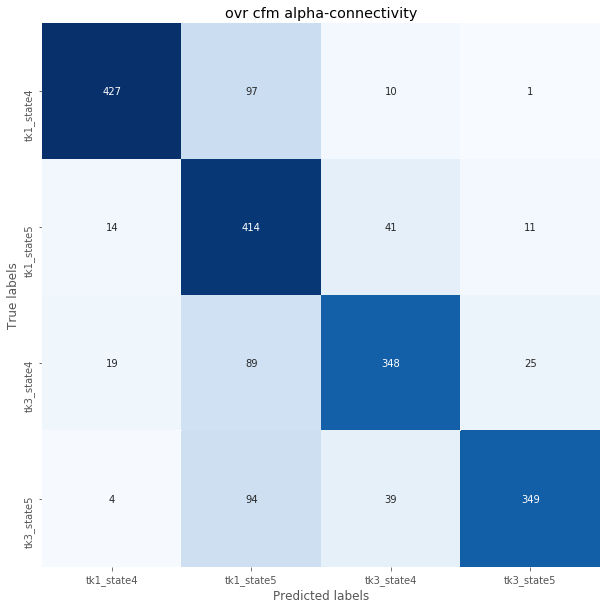

In [61]:
alpha_losses = []
alpha_cfms = []

for result in alpha_results:
    alpha_losses.append(-result['loss'])
    alpha_cfms.append(result['cfm'])
    
alpha_cfms = np.array(alpha_cfms)

mean_alpha_cfm = np.mean(alpha_cfms, axis=0)

# mean_alpha_cfm = (mean_alpha_cfm - mean_alpha_cfm.min()) / (mean_alpha_cfm.max() - mean_alpha_cfm.min())
viz_cfm(np.round(mean_alpha_cfm), 'ovr cfm alpha-connectivity')

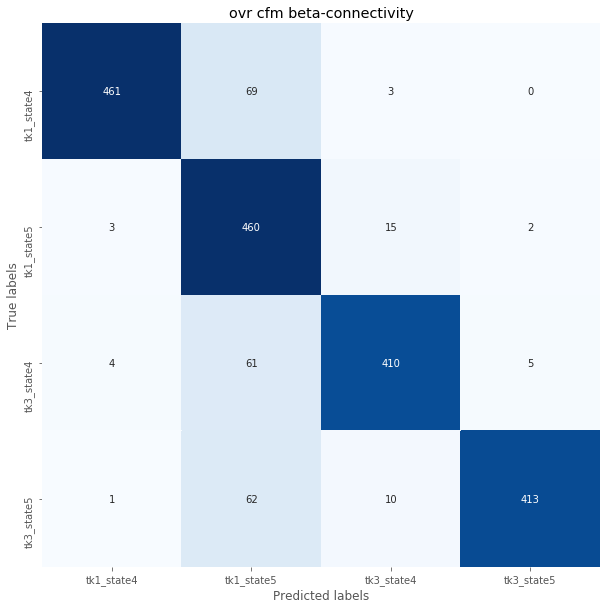

In [62]:
beta_losses = []
beta_cfms = []

for result in beta_results:
    beta_losses.append(-result['loss'])
    beta_cfms.append(result['cfm'])
    
beta_cfms = np.array(beta_cfms)

mean_beta_cfm = np.mean(beta_cfms, axis=0)

# mean_beta_cfm = (mean_beta_cfm - mean_beta_cfm.min()) / (mean_beta_cfm.max() - mean_beta_cfm.min())
viz_cfm(np.round(mean_beta_cfm), 'ovr cfm beta-connectivity')

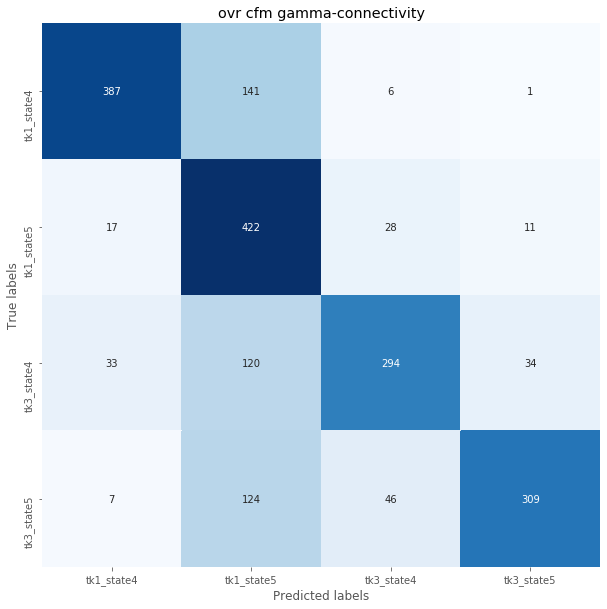

In [63]:
gamma_losses = []
gamma_cfms = []

for result in gamma_results:
    gamma_losses.append(-result['loss'])
    gamma_cfms.append(result['cfm'])
    
gamma_cfms = np.array(gamma_cfms)

mean_gamma_cfm = np.mean(gamma_cfms, axis=0)

# mean_gamma_cfm = (mean_gamma_cfm - mean_gamma_cfm.min()) / (mean_gamma_cfm.max() - mean_gamma_cfm.min())
viz_cfm(np.round(mean_gamma_cfm), 'ovr cfm gamma-connectivity')

Text(0, 0.5, 'Avg. Accuracy')

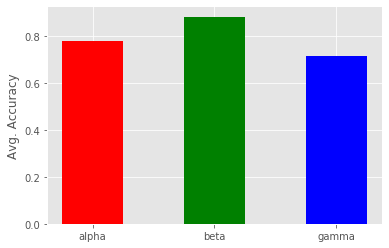

In [75]:

alpha_mean_loss = np.mean(alpha_losses)
beta_mean_loss = np.mean(beta_losses)
gamma_mean_loss = np.mean(gamma_losses)

plt.bar(['alpha', 'beta', 'gamma'], [alpha_mean_loss, beta_mean_loss, gamma_mean_loss], 0.5, color=['r', 'g', 'b'])
plt.ylabel('Avg. Accuracy')

In [164]:
band_losses = []
for trial in results.trials:
    if trial['result']['status'] == 'ok':
        if trial['result']['space']['band'] == 'alpha':
            band_losses.append((0, -trial['result']['loss']))
        elif trial['result']['space']['band'] == 'beta':
            band_losses.append((1, -trial['result']['loss']))
        else:
            band_losses.append((2, -trial['result']['loss']))

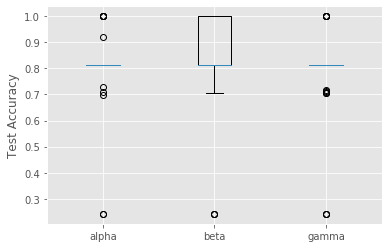

In [166]:
band_losses = np.array(band_losses)
df = pd.DataFrame(band_losses, columns=['bands', 'acc'])
pivot = df.pivot(columns='bands', values='acc').fillna(-np.mean(results.losses()))

plt.boxplot(pivot.values)
plt.xticks([1,2,3], ['alpha', 'beta', 'gamma'])
plt.ylabel('Test Accuracy')
plt.show()


# plt.show()

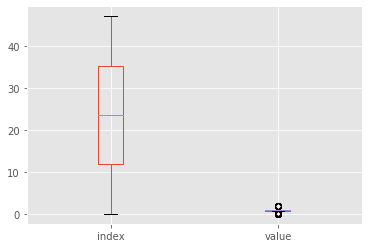

In [139]:
melt.boxplot()

In [132]:
band_losses[band_losses[:,0] == 0][:,1]

array([0.69848485, 0.70858586, 0.72777778, 0.24191919, 1.        ,
       0.92020202, 1.        , 0.24191919, 1.        , 1.        ,
       1.        ])